<Figure size 432x288 with 0 Axes>

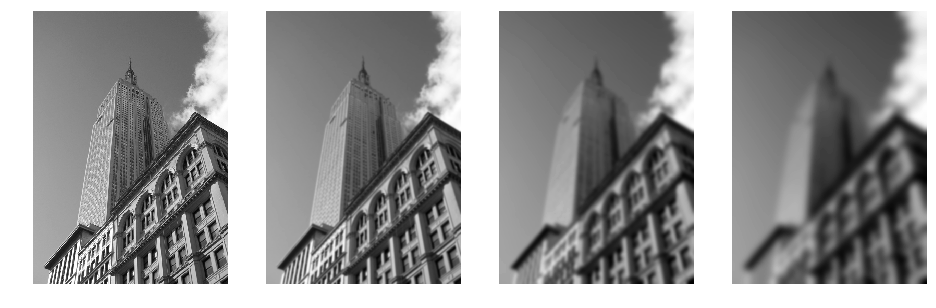

In [2]:
# Gaussian blurring images

from PIL import Image
from numpy import *
from scipy.ndimage import filters
from pylab import *

im = array(Image.open('resources/empire.jpg').convert('L'))
im1 = filters.gaussian_filter(im,2)
im2 = filters.gaussian_filter(im,5)
im3 = filters.gaussian_filter(im,10)

gray()
fig, axs = subplots(1, 4, figsize=(16, 16))
axs[0].imshow(im)
axs[0].axis('off')

axs[1].imshow(im1)
axs[1].axis('off')

axs[2].imshow(im2)
axs[2].axis('off')

axs[3].imshow(im3)
axs[3].axis('off')
show()

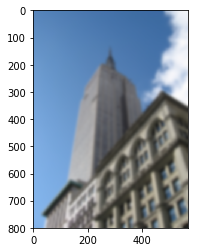

In [3]:
# Blurring RGB images

im = array(Image.open('resources/empire.jpg'))
im2 = zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],5)
    im2 = uint8(im2)

im2 = array(im2,'uint8')
figure()
imshow(im2)
show()

<Figure size 432x288 with 0 Axes>

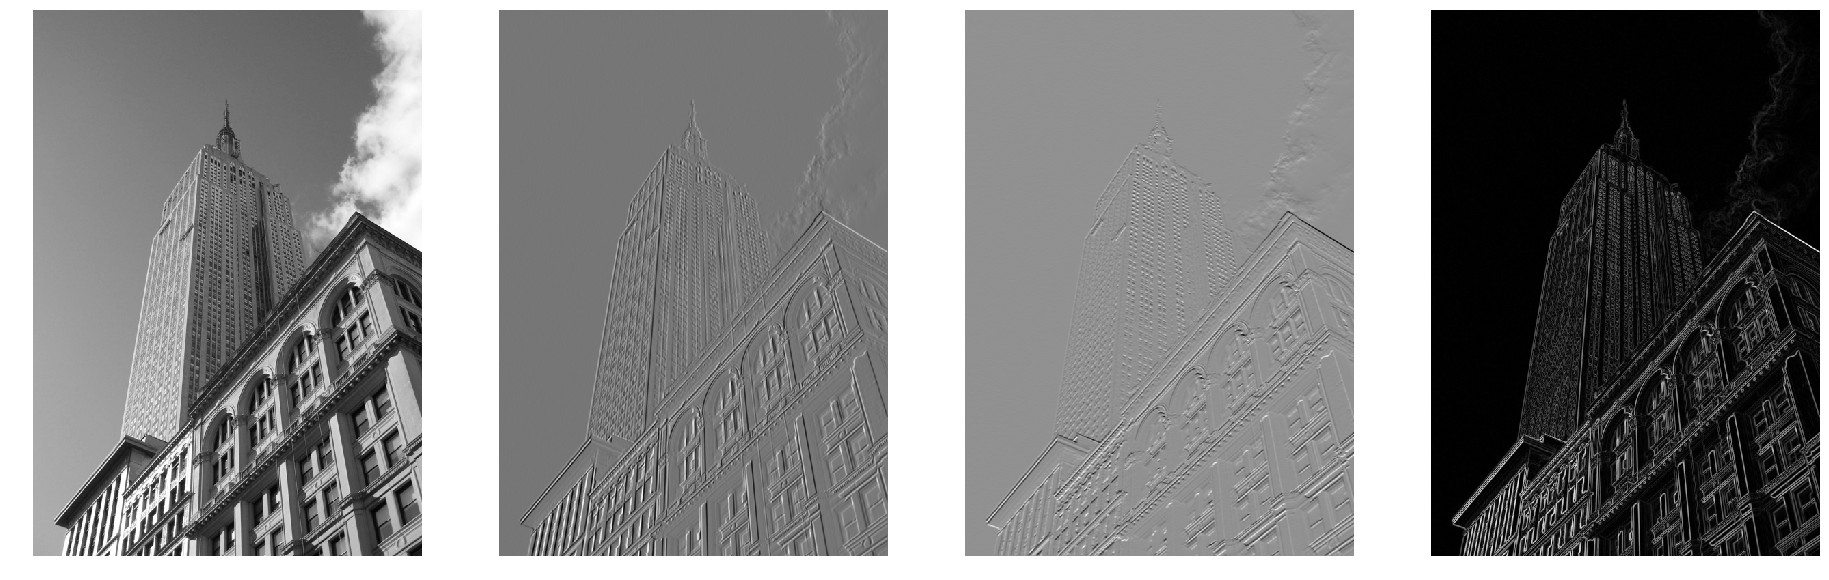

In [5]:
# Sobel derivative filters

im = array(Image.open('resources/empire.jpg').convert('L'))

imx = zeros(im.shape)
filters.sobel(im,1,imx)

imy = zeros(im.shape)
filters.sobel(im,0,imy)

magnitude = sqrt(imx**2+imy**2)

gray()
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('off')

axs[1].imshow(imx)
axs[1].axis('off')

axs[2].imshow(imy)
axs[2].axis('off')

axs[3].imshow(magnitude)
axs[3].axis('off')
show()

<Figure size 432x288 with 0 Axes>

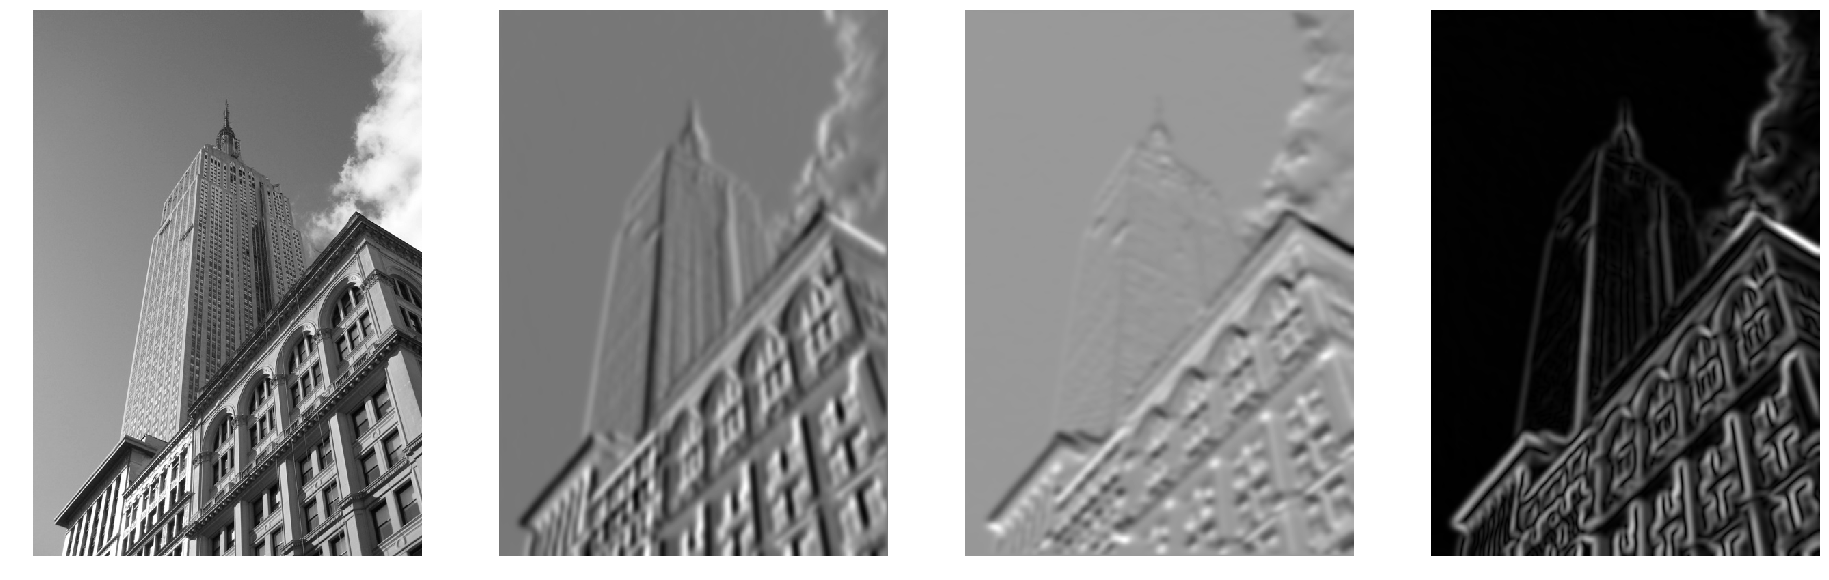

In [6]:
sigma = 5 #standard deviation

imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)

imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)

magnitude = sqrt(imx**2+imy**2)

gray()
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('off')

axs[1].imshow(imx)
axs[1].axis('off')

axs[2].imshow(imy)
axs[2].axis('off')

axs[3].imshow(magnitude)
axs[3].axis('off')
show()

In [7]:
# Morphology - counting objects

from scipy.ndimage import measurements,morphology
"""
This is the morphology counting objects example in Section 1.4.
"""

# load image and threshold to make sure it is binary
im = array(Image.open('resources/houses.png').convert('L'))
bim = (im<128)

labels, nbr_objects = measurements.label(bim)
print("Number of objects:", nbr_objects)

# morphology - opening to separate objects better
im_open = morphology.binary_opening(bim, ones((9,5)), iterations=2) 

labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)

Number of objects: 45
Number of objects: 48


<Figure size 432x288 with 0 Axes>

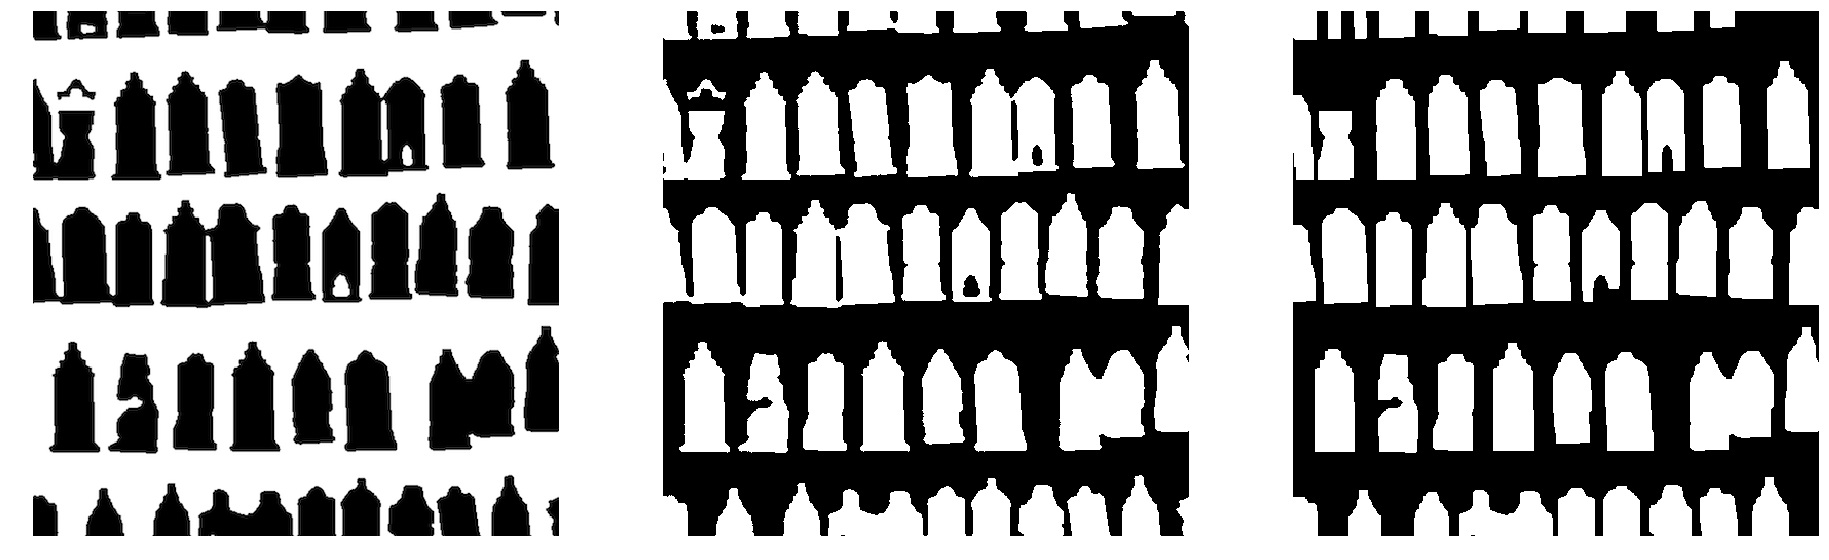

In [8]:
gray()
fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('off')

axs[1].imshow(bim)
axs[1].axis('off')

axs[2].imshow(im_open)
axs[2].axis('off')
show()

<Figure size 432x288 with 0 Axes>

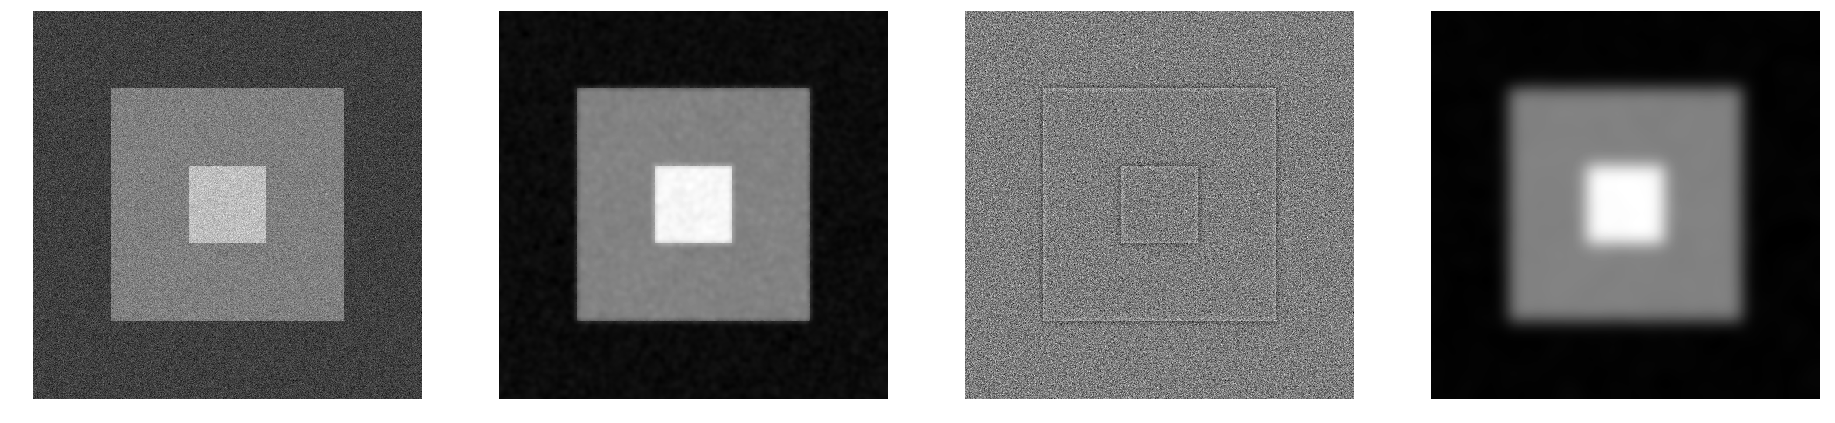

In [17]:
import numpy as np
from scipy.ndimage import filters
from PCV.tools import rof
from pylab import *

# create synthetic image with noise
im = zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255

im = im + 30 * np.random.standard_normal((500,500))
U,T = rof.denoise(im,im)
G = filters.gaussian_filter(im,10)

gray()
fig, axs = subplots(1, 4, figsize=(32, 32))

axs[0].imshow(im)
axs[0].axis('off')

axs[1].imshow(U)
axs[1].axis('off')

axs[2].imshow(T)
axs[2].axis('off')

axs[3].imshow(G)
axs[3].axis('off')
show()

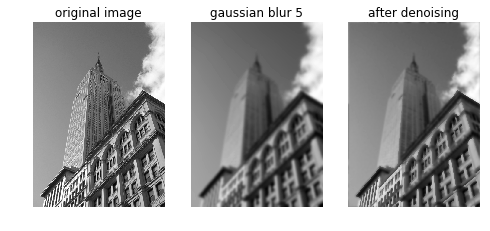

In [21]:
# Denoising Image

im = array(Image.open('resources/empire.jpg').convert('L'))
im2 = filters.gaussian_filter(im,5) # gaussian blur 5
U,T = rof.denoise(im,im) # denoising

fig, axs = subplots(1, 3, figsize=(8, 8))
axs[0].imshow(im)
axs[0].axis('off')
axs[0].set_title('original image')

axs[1].imshow(im2)
axs[1].axis('off')
axs[1].set_title('gaussian blur 5')

axs[2].imshow(U)
axs[2].axis('off')
axs[2].set_title('after denoising')
show()